In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Zad 3
Metodą aproksymacji średniokwadratowej (ciągłej) wyznaczyć wielomian stopnia co
najwyżej drugiego aproksymujący funkcje $y = sin x, x ∈ [0, π/2]$ przy użyciu bazy:
a) $\{1, x, x2\}$, b) wielomianów Legendre’a $P_i(x) = \frac{1}{2^i i!} \frac{d^i}{dx^i}(x^2 - 1)^i,\;  i = 0, 1, 2 $, przetransformowanych do przedziału $[0, π/2]$.

In [18]:
x = np.linspace(0, np.pi/2, 1000)
y = np.sin(x)

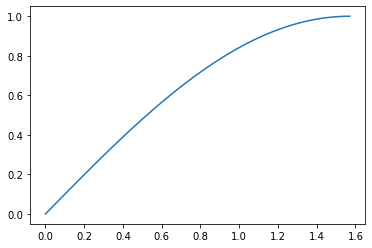

In [19]:
plt.plot(x, np.sin(x))
plt.show()

a) baza 

$\{ \phi_1, \phi_2, \phi_3 \} = \{1, x, x^2\}$

Tworzymy macierze dla alfy, beta  i rozwiązujemy układ równań

$\alpha_{i,j} = \langle \phi_i,\phi_j \rangle$

$\beta_i = \langle \sin{x}, \phi_k \rangle$

$$\left[\begin{array}{ccc}
\alpha_{1,1} & \alpha_{1,2} & \dots \\
\alpha_{2,1} & \dots  &\dots\\
\dots& \dots&\alpha_{3,3}
\end{array}\right]$$

In [21]:
pi = np.pi
alpha_m = np.array([[pi/2, pi**2/8, pi**3/24], [pi**2/8, pi**3/24, pi**4/64], [pi**3/24, pi**4/64, pi**5/160]])
beta_m = np.array([1, 1, pi-2])

In [22]:
alpha_m_inv = np.linalg.inv(alpha_m)

In [23]:
a = np.matmul(alpha_m_inv, beta_m)
a

array([-0.02432495,  1.19574506, -0.33824001])

In [24]:
def fi(x):
    n = len(x)
    result_list = []
    for i in range(n):
        result_list.append([1, x[i], x[i]**2])
    
    return result_list
        


In [25]:
fi_x = fi(x)

In [26]:
n = 3
f_list = np.zeros(len(x))
for i in range(len(x)):
    sigma = 0
    for j in range(n):
        sigma += a[j] * fi_x[i][j]
    
    f_list[i] = sigma

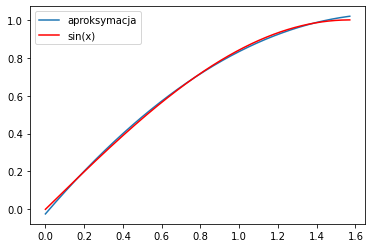

In [29]:
plt.plot(x, f_list, label = 'aproksymacja')
plt.plot(x, y, color = 'red', label = 'sin(x)')
plt.legend()
plt.show()

b) Wielomiany Legendre'a

Dla $x \in [-1, 1]$

$$P_i(x) = \frac{1}{2^i i!} \frac{d^i}{dx^i}(x^2 - 1)^i,\;  i = 0, 1, 2 $$

Mamy

$$ -1 < x < 1 \to 0 < \frac{\pi(x + 1)}{4} < \frac{\pi}{2}$$

Jeśli $ t = \frac{\pi(x + 1)}{4}, \; t\in[0, \frac{\pi}{2}]$. To $x = \frac{4t}{\pi}-1$

Podstawiamy do wzoru dla $P_i(x)$ i otrzymujemy (Redaktor: przy delikatnej pomocy Wolframa)

$$ P0 = 1,$$
$$ P1 = \frac{4}{\pi^2}(4t-\pi),$$
$$ P2 = \frac{16}{\pi^4}(24t^2 - 12\pi t + \pi^2). $$

Ortonormalizacja:

$$ P_k = \frac{P_k}{||P_k||} = \frac{P_k}{\sqrt{\langle P_k, P_k \rangle}} = \frac{P_k}{\sqrt{\int ^{\frac{\pi}{2}}_0 P_k ^2}}$$

Wtedy

$$ P_0 = \sqrt{\frac{2}{\pi}}, $$
$$ P_1 = \frac{4\sqrt(3\pi)}{\pi^2\sqrt{8}}(4t - \pi) $$
$$ \frac{14\sqrt{5\pi^3}}{\pi^4\sqrt{128}}(24t^2 - 12\pi t + \pi^2) $$

Korzystamy ze wzoru podanego na wykładzie

$$ \sin{t} = \Sigma^3 _{k = 1} a_k^* \psi_k, $$

$\{\psi_1, \psi_2, \psi_3$\} = \{P_0, P_1, P_2 \},

$a_i^* = \langle \sin{t}, \psi_k \rangle$

Wyliczamy $a^*$ przy pomocy Wolframa lub na kartce jak kto woli

In [38]:
a_1 = np.sqrt(2/pi)
a_2 = - np.sqrt(6/(pi**3))*(pi - 4)
a_3 = np.sqrt(10/(pi**5))*(pi**2 + 12*pi - 48)
a_list = [a_1, a_2, a_3]

In [30]:
t = np.linspace(0, pi/2, 1000)
y_b = np.sin(t)

In [39]:
psi_1 = np.sqrt(2/pi)
psi_2 = 4 * np.sqrt(3 * pi)/(pi**2 *np.sqrt(8))*(4 * t-pi)
psi_3 = (16*np.sqrt(5*pi**3))/(pi**4*np.sqrt(128))*(24*t**2 - 12*pi*t + pi**2)
psi_list = [psi_1, psi_2, psi_3]

In [41]:
n = 3
result = 0
for i in range(n):
    result += a_list[i]*psi_list[i]

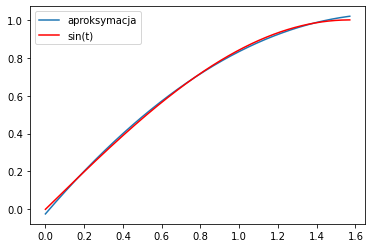

In [43]:
plt.plot(t, result, label = 'aproksymacja')
plt.plot(t, y_b, color = 'red', label = 'sin(t)')
plt.legend()
plt.show()